In [1]:
# !wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

In [2]:
# !unzip dataset.zip?dl=0

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import Flatten, Dense
from keras.models import Model
# from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [5]:
opt = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy'] )
model.compile(optimizer=opt, loss= categorical_crossentropy , metrics=['accuracy'] )

# Preparing our data using data generator

In [6]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

# train_data = train_datagen.flow_from_directory(directory= "./train", 
                                             #   target_size=(224,224), 
                                             #   batch_size=32,
                              #     )

train_data = train_datagen.flow_from_directory(directory= "./train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

# val_data = val_datagen.flow_from_directory(directory= "./train", 
#                                            target_size=(224,224), 
#                                            batch_size=32,
#                                   )

val_data = val_datagen.flow_from_directory(directory= "./test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

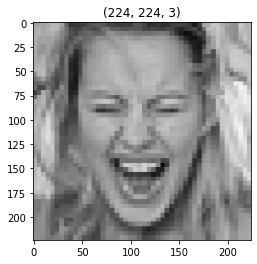

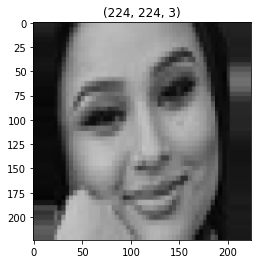

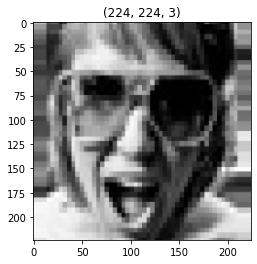

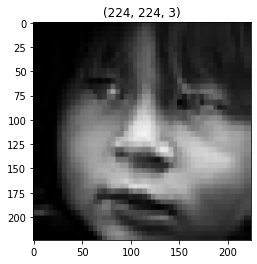

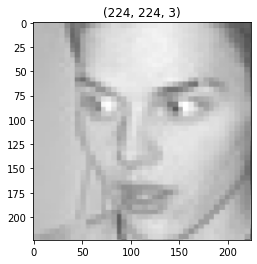

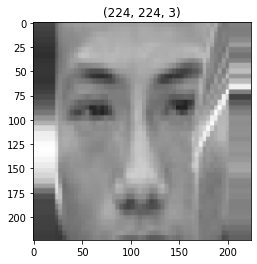

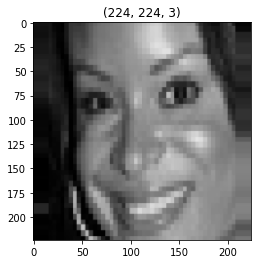

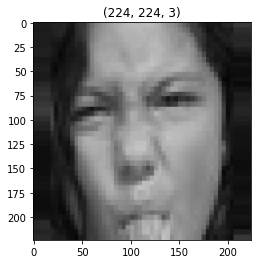

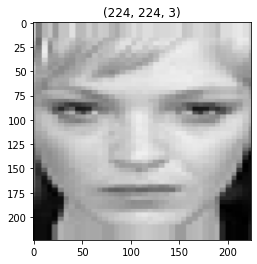

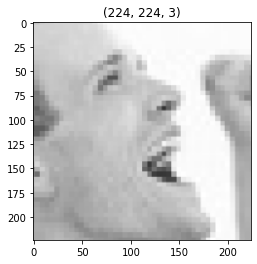

In [8]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [9]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point

# mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')
mc = ModelCheckpoint(filepath="trial.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [10]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 40, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

C:\Users\akash\AppData\Local\Temp/ipykernel_14124/2200884467.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/40
10/10 [==============================] - ETA: 0s - loss: 18.0728 - accuracy: 0.2094
Epoch 1: val_accuracy improved from -inf to 0.26953, saving model to trial.h5
10/10 [==============================] - 17s 2s/step - loss: 18.0728 - accuracy: 0.2094 - val_loss: 14.5503 - val_accuracy: 0.2695
Epoch 2/40
10/10 [==============================] - ETA: 0s - loss: 12.3676 - accuracy: 0.3562
Epoch 2: val_accuracy improved from 0.26953 to 0.38672, saving model to trial.h5
10/10 [==============================] - 21s 2s/step - loss: 12.3676 - accuracy: 0.3562 - val_loss: 7.2540 - val_accuracy: 0.3867
Epoch 3/40
10/10 [==============================] - ETA: 0s - loss: 7.9323 - accuracy: 0.3812
Epoch 3: val_accuracy improved from 0.38672 to 0.40625, saving model to trial.h5
10/10 [==============================] - 20s 2s/step - loss: 7.9323 - accuracy: 0.3812 - val_loss: 7.0211 - val_accuracy: 0.4062
Epoch 4/40
10/10 [==============================] - ETA: 0s - loss: 7.2088 - accuracy:

In [11]:

# Loading the best fit model 
from keras.models import load_model
# model = load_model("./best_model.h5")
model = load_model("./trial.h5")

In [12]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

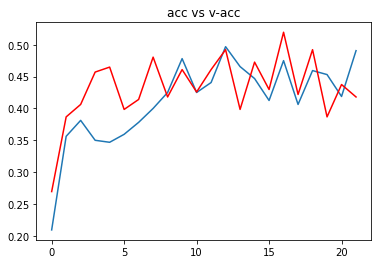

In [13]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

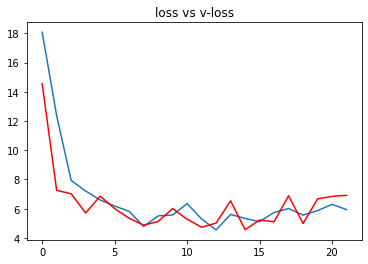

In [14]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [15]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 [==============================] - 0s 41ms/step
 the image is of sad


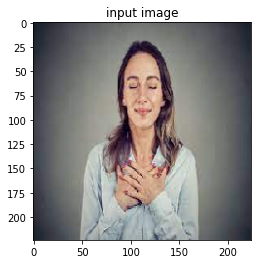

In [18]:
# path for the image to see if it predics correct class

# path = "./train/angry/images.jpg"
path = "Newfolder/train/Happy/download.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()